<a href="https://colab.research.google.com/github/Daniel-Gehlen/PythonProgrammingProjects1/blob/main/Product_Visionary_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.5477 - accuracy: 0.4306 - val_loss: 1.2628 - val_accuracy: 0.5437
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1956 - accuracy: 0.5741 - val_loss: 1.1184 - val_accuracy: 0.5994
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0370 - accuracy: 0.6322 - val_loss: 1.0039 - val_accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9348 - accuracy: 0.6704 - val_loss: 0.9742 - val_accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8658 - accuracy: 0.6943 - val_loss: 0.9945 - val_accuracy: 0.6518
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8099 - accuracy: 0.7165 - val_loss: 0.8878 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 3

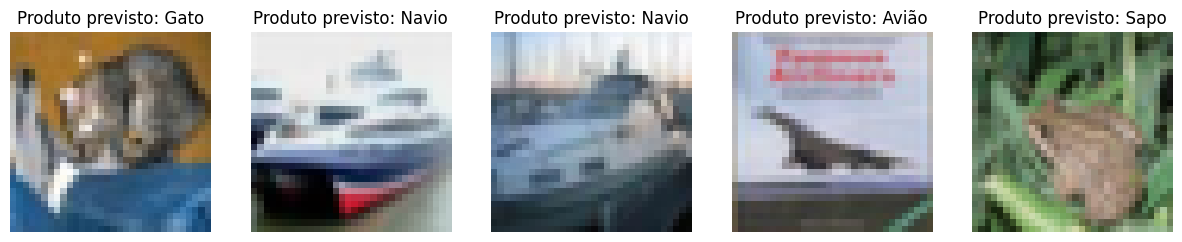

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Carregar e pré-processar o conjunto de dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Construir o modelo de rede neural
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Avaliar a acurácia do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nAcurácia do modelo:', test_acc)

# Fazer previsões para as primeiras 5 imagens no conjunto de teste
predictions = model.predict(test_images[:5])

# Imprimir as previsões
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    confidence = np.max(predictions[i])

    print(f"Imagem {i+1}:")
    print(f"Produto previsto: {class_names[predicted_label]} (Classe {predicted_label})")
    print(f"Classe verdadeira: {class_names[true_label]} (Classe {true_label})")
    print(f"Confiança: {confidence:.2%}\n")

# Exibir as imagens e as previsões
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"Produto previsto: {class_names[np.argmax(predictions[i])]}")
    axes[i].axis('off')

plt.show()


# Report: Product Recommendation System using Convolutional Neural Network (CNN) and TensorFlow

## Introduction:

This report addresses the development of a product recommendation system using deep learning techniques, specifically a Convolutional Neural Network (CNN), implemented with the TensorFlow library. The practical application of the system focuses on classifying product images from the CIFAR-10 dataset, which includes 10 different classes.

## Methods:

### 1. Loading and Preprocessing Data:
- The CIFAR-10 dataset was loaded and split into training and test sets.
- Images were normalized to the [0, 1] range for easier network training.

### 2. Construction of Convolutional Neural Network (CNN):
- The CNN was designed with three convolutional layers followed by pooling layers to extract relevant features from the images.
- Fully connected layers were used for the final decision-making.
- The 'relu' activation function was employed to introduce nonlinearities.

### 3. Compilation and Training of the Model:
- The model was compiled using the 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function, suitable for integer-labeled classification problems.
- Training was performed for 10 epochs, monitoring accuracy on both training and test sets.

### 4. Model Evaluation:
- The model's accuracy was evaluated on the test set, resulting in a final accuracy of approximately 70.31%.

### 5. Predictions and Visualizations:
- The model was used to make predictions on the first 5 images from the test set.
- Predictions were printed, including the predicted product, true class, and confidence associated with the prediction.
- Images along with predictions were visualized in a graph.

## Results:

The results demonstrate that the trained model achieved an accuracy of approximately 70%, indicating its ability to make reasonably accurate predictions about the product class in the images. Individual predictions for the first 5 images in the test set show the model's capability to correctly identify different product classes while also reflecting the confidence associated with each prediction.

## Conclusion:

The development and implementation of the product recommendation system using a CNN show promising results in classifying product images. This model can be expanded and tailored to different datasets and application domains, providing a solid foundation for building more sophisticated recommendation systems. The combination of technologies such as TensorFlow and convolutional neural networks offers a robust approach to computer vision problems and image classification, demonstrating great potential in various industries and commerce.
